In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Number of arms (actions)
k = 10
N = np.zeros(k)

In [2]:
# Step-size parameter (constant)
alpha = 0.1

# Exploration rate
epsilon = 0.1

# Number of time steps and episodes
episodes = 2000
time_steps = 5000

In [3]:
# Placeholder for average rewards with random walks
avg_rewards_rw = np.zeros(time_steps)
avg_rewards_constant_rw = np.zeros(time_steps)

# Random seed for reproducibility
np.random.seed(42)


In [6]:
for episode in range(episodes):
    # Initialize action values and counts
    Q1 = np.zeros(k)
    Q2 = np.zeros(k)
    N = np.zeros(k)
    # Initialize true action values
    true_rewards = np.random.randn(k)
    
    for t in range(time_steps):
        
        
        true_rewards += np.random.randn(k) * 0.01  # Small random walk step
        
        # Choose action1
        if np.random.rand() < epsilon:
            A1 = np.random.choice(k)  # Explore
        else:
            A1 = np.argmax(Q1)  # Exploit
            
        # Choose action2
        if np.random.rand() < epsilon:
            A2 = np.random.choice(k)  # Explore
        else:
            A2 = np.argmax(Q2)  # Exploit
            
        # Reward from the reward distribution
#         R1 = np.random.randn() + true_rewards[A1]
#         R2 = np.random.randn() + true_rewards[A2]
        R1 =  true_rewards[A1]
        R2 =  true_rewards[A2]
        
        # Update the count of actions
        N[A1] += 1

        # Update the estimated value of the chosen action
        Q1[A1] += (R1 - Q1[A1]) / N[A1]
        Q2[A2] += alpha * (R2 - Q2[A2])
        
        # Update the average rewards with random walks
        avg_rewards_rw[t] += R1
        avg_rewards_constant_rw[t] += R2

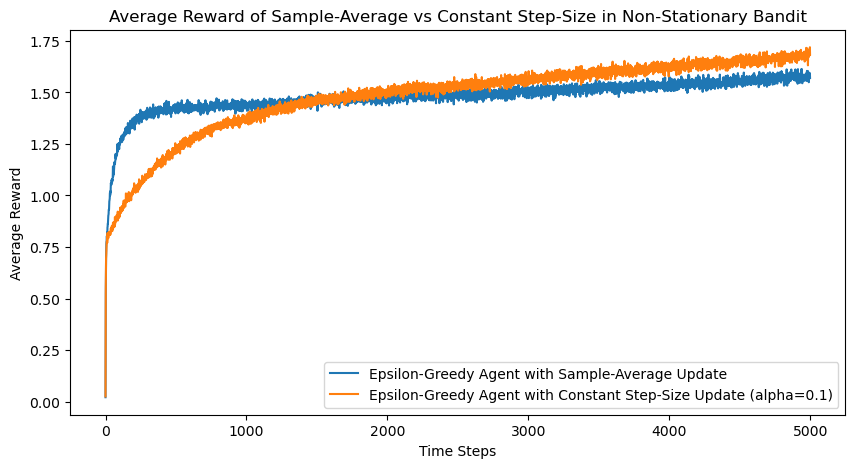

In [7]:
# Average rewards over all episodes with random walks
avg_rewards_rw /= episodes
avg_rewards_constant_rw /= episodes

# Plot the average rewards over time
plt.figure(figsize=(10, 5))
plt.plot(avg_rewards_rw, label='Epsilon-Greedy Agent with Sample-Average Update')
plt.plot(avg_rewards_constant_rw, label='Epsilon-Greedy Agent with Constant Step-Size Update (alpha=0.1)')
plt.xlabel('Time Steps')
plt.ylabel('Average Reward')
plt.legend()
plt.title('Average Reward of Sample-Average vs Constant Step-Size in Non-Stationary Bandit')
plt.show()
